In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Exercise 7
#### Simulated Annealing
---


### 1. Travelling Salesman with Random Coordinates

#### a)

The Traveling Salesman Problem (TSP) involves finding the shortest route that allows a salesman to visit each station once and return to the starting point. The simulated annealing method starts with a random route and makes small changes, such as swapping two stations, to gradually find a shorter path. While it initially accepts both improvements and some worse routes to explore the solution space, it increasingly favors better routes as the process continues. This method efficiently finds a near-optimal route without needing to examine every possible route. The purpose of cooling function is to make the algorithm converge. The lenght of the path from station to station can be more generally understood as cost of transition from position "a" to position "b".  

In [2]:
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def calculate_cost(route, positions):
    return sum(euclidean_distance(positions[route[i]], positions[route[i + 1]]) for i in range(len(route) - 1))

def swap_stations(route):
    idx = range(len(route))
    i1, i2 = np.random.choice(idx, 2, replace=False)
    new_route = np.copy(route)
    new_route[i1], new_route[i2] = new_route[i2], new_route[i1]
    return new_route

def simulated_annealing(positions, temp_func, cost_history = [], max_iterations=1000):
    n = len(positions)
    current_route = np.random.permutation(n)
    current_route = np.append(current_route, current_route[0])
    current_cost = calculate_cost(current_route, positions)
    
    for k in range(max_iterations):
        T = temp_func(k)
        new_route = swap_stations(current_route[:-1])
        new_route = np.append(new_route, new_route[0])
        new_cost = calculate_cost(new_route, positions)
        
        if new_cost < current_cost or np.random.rand() < np.exp(-(new_cost - current_cost) / T):
            current_route, current_cost = new_route, new_cost
        
        cost_history.append(current_cost)

        if T < 1e-3:
            break
    
    return current_route, current_cost, cost_history

def cooling_schedule(k):
    return 1 / math.sqrt(1 + k)
    # return -np.log(k+1)

First let's check if algorithm works correctly by making a "circle path".

Final route cost: 6.257378601609234


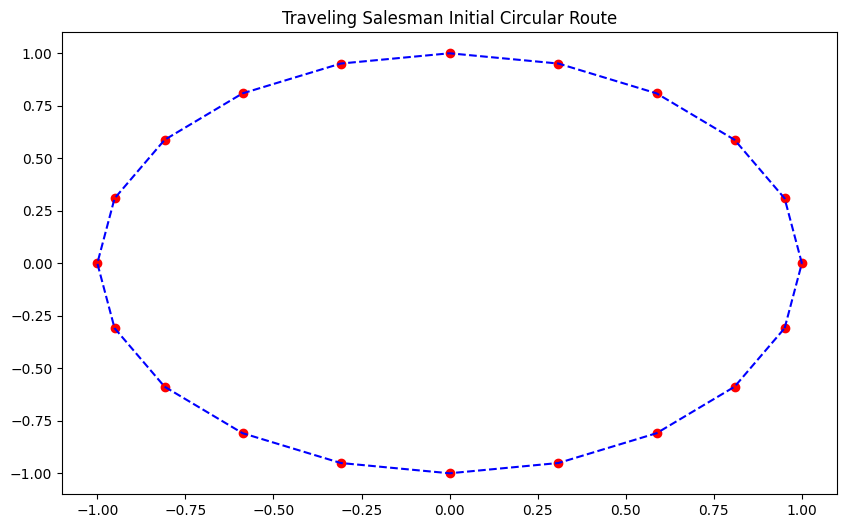

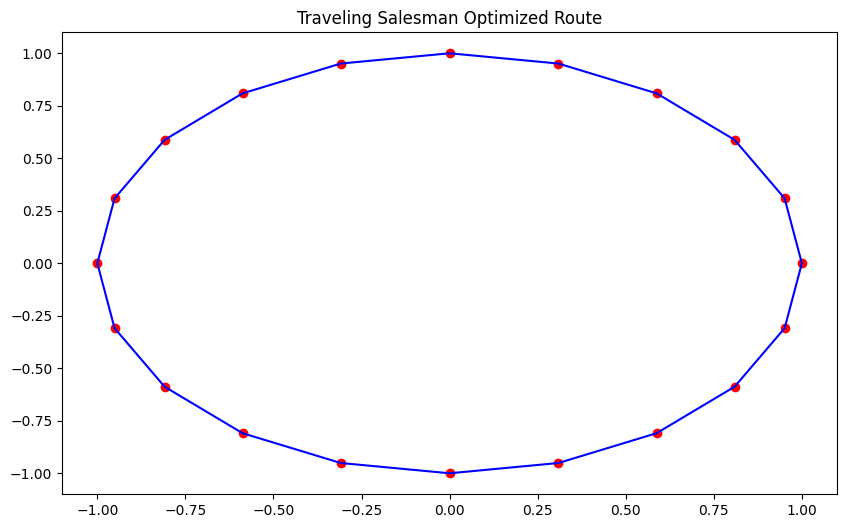

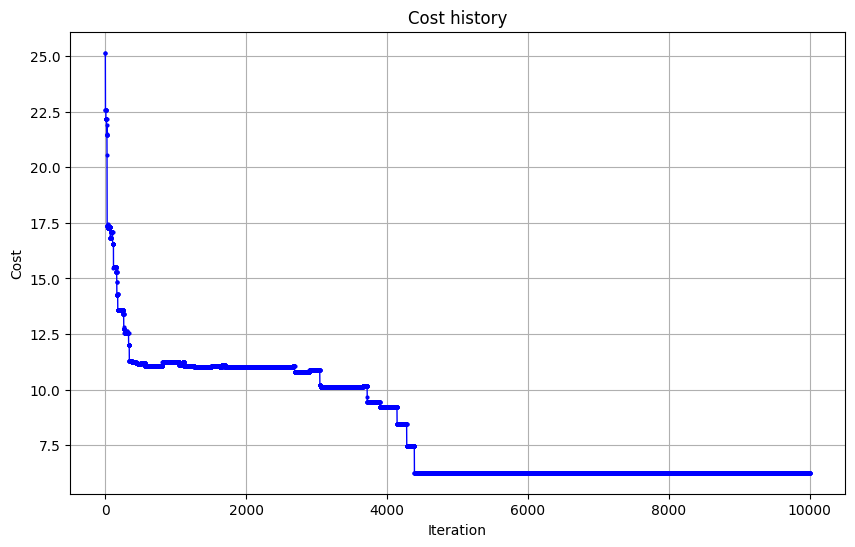

In [3]:
number_of_stations = 20
max_iterations = 10_000
theta = np.linspace(0, 2 * np.pi, number_of_stations, endpoint=False)
radius = 1
positions = np.vstack((radius * np.cos(theta), radius * np.sin(theta))).T

route, cost, cost_history = simulated_annealing(positions, cooling_schedule, max_iterations=max_iterations)
print("Final route cost:", cost)

plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='red')
plt.plot(positions[np.arange(number_of_stations), 0], positions[np.arange(number_of_stations), 1], color='blue', linestyle='--')
plt.plot([positions[-1, 0], positions[0, 0]], [positions[-1, 1], positions[0, 1]], color='blue', linestyle='--')
plt.title('Traveling Salesman Initial Circular Route')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='red')
plt.plot(positions[route, 0], positions[route, 1], color='blue')
plt.title('Traveling Salesman Optimized Route')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='blue', marker='o', linestyle='-', linewidth=1, markersize=2)
plt.title("Cost history")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

Our algorithm seems to work corectly. It most of the times returns a perfect circle, but sometimes it does end up with not optimal path (not a circle) I think that this due to the algorithm being a "Heuristic Algorithm" which means it will not always return an optimal solution. It explores the space and looks for a global minimum but can end up in a local minimum befor finding a global one. Now let's try to optimize more complex routes.

Final route cost: 4.054896422830128


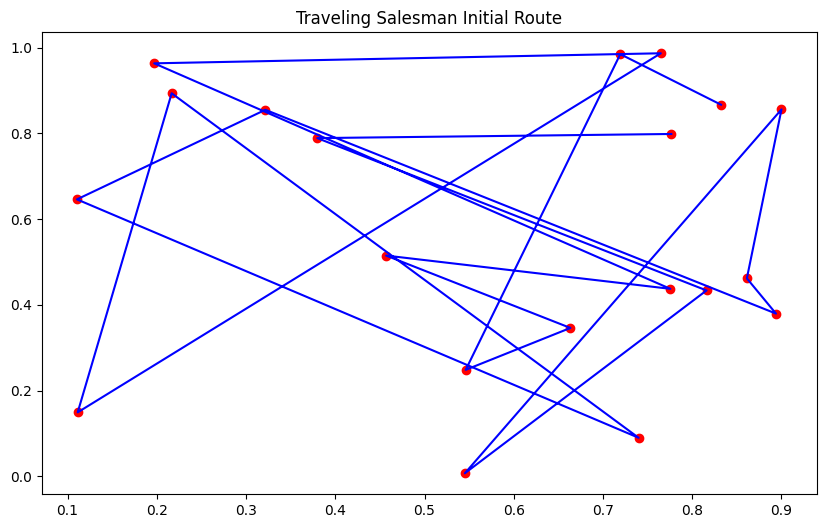

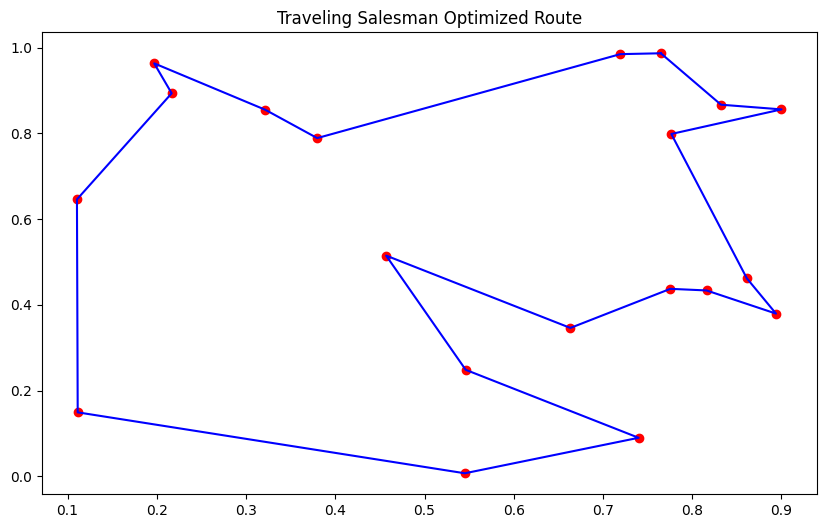

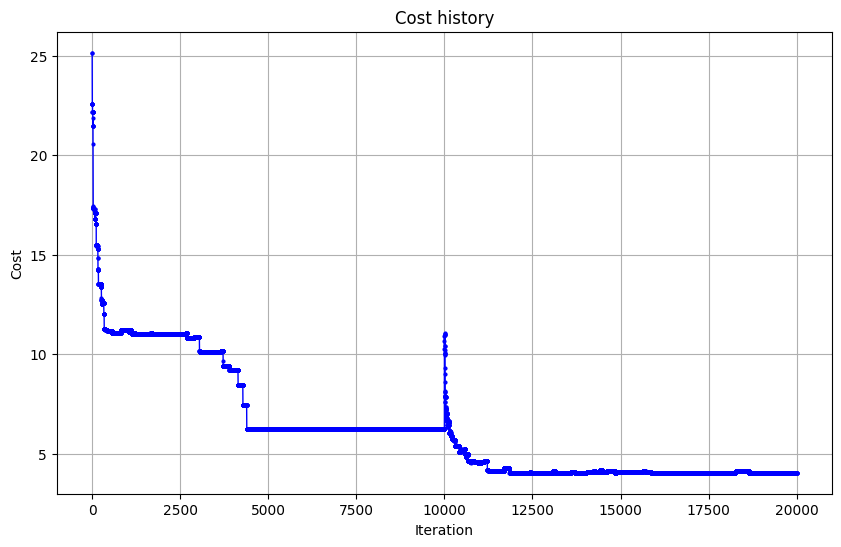

In [4]:
number_of_stations = 20
max_iterations = 10_000
positions = np.random.rand(number_of_stations, 2)

route, cost, cost_history = simulated_annealing(positions, cooling_schedule, max_iterations=max_iterations)
print("Final route cost:", cost)

# Plotting the initial route
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='red')
plt.plot(positions[np.arange(number_of_stations), 0], positions[np.arange(number_of_stations), 1], color='blue')
plt.title('Traveling Salesman Initial Route')
plt.show()

# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='red')
plt.plot(positions[route, 0], positions[route, 1], color='blue')
plt.title('Traveling Salesman Optimized Route')
plt.show()

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='blue', marker='o', linestyle='-', linewidth=1, markersize=2)
plt.title("Cost history")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


The algorithm works well, after running it we turn a completly messy route into optimal or almost optimal route. Obviously the more simulations we perform the better the chance for getting an ideal route. The other cooling scheme (-np.log(k+1)) does not seem to work, the route is very messy even after running the algorithm.

#### b)

As requested we extended to code functionality to be able to work with the costs matrix provided by Professor.

Optimal route cost: 1188
Route: [17  6 11  5 12  3  0  1  8 13 18 14  2 10 19 16  4  7  9 15 17]


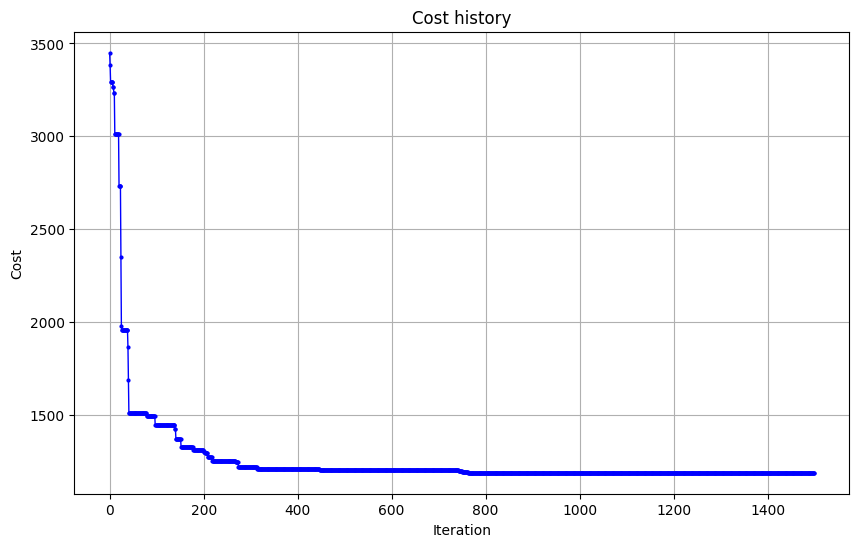

In [5]:
def calculate_cost(route, cost_matrix):
    return sum(cost_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))

def swap_stations(route):
    idx = range(len(route))
    i1, i2 = np.random.choice(idx, 2, replace=False)
    new_route = np.copy(route)
    new_route[i1], new_route[i2] = new_route[i2], new_route[i1]
    return new_route

def simulated_annealing(cost_matrix, temp_func, cost_history = [], max_iterations=1000):
    n = cost_matrix.shape[0]
    current_route = np.random.permutation(n)
    current_route = np.append(current_route, current_route[0])
    current_cost = calculate_cost(current_route, cost_matrix)

    for k in range(max_iterations):
        T = temp_func(k)
        new_route = swap_stations(current_route[:-1])
        new_route = np.append(new_route, new_route[0])
        new_cost = calculate_cost(new_route, cost_matrix)
        
        if new_cost < current_cost or np.random.rand() < np.exp(-(new_cost - current_cost) / T):
            current_route, current_cost = new_route, new_cost

        cost_history.append(current_cost)

        if T < 1e-3:
            break
    
    return current_route, current_cost, cost_history

def cooling_schedule(k):
    return 1 / math.sqrt(1 + k)
    # return -np.log(k+1)

max_iterations = 1500
cost_matrix = pd.read_csv('C:\\Users\\kubus\\Downloads\\cost.csv', header=None).to_numpy()

route, cost, cost_history = simulated_annealing(cost_matrix, cooling_schedule, max_iterations=max_iterations)
print("Optimal route cost:", cost)
print("Route:", route)

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='blue', marker='o', linestyle='-', linewidth=1, markersize=2)
plt.title("Cost history")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

With this setup the optimized route is being found in much much less iterations.